In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from pathlib import Path
from sklearn.preprocessing import LabelEncoder
import PIL
import cv2
import numpy as np
import pandas as pd
import os
import zipfile
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

Extract the folder

In [ ]:
def unzip_folder(zip_file, destination_folder):
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(destination_folder)


zip_file = '/content/BrailleInputImg.zip'  # Path to your zip file
destination_folder = '/content/BrailleInputImgs'  # Path of extracted folder

unzip_folder(zip_file, destination_folder)


Preparation of dataset

In [ ]:
image_dir = Path('/content/BrailleInputImgs/Braille Dataset/Braille Dataset')
dir_list = list(image_dir.glob('*.jpg'))

Get the class name of each image

In [ ]:
img_class = []
for img_path in dir_list:
  temp = os.path.basename(img_path)
  img_class.append(temp[0])

Convert the images to data

In [ ]:
img_data = []

for img_path in dir_list:
    I = cv2.imread(str(img_path))
    img_data.append(I)

Convert to numpy

In [ ]:
images_list = np.array(img_data)
name_list = np.array(img_class).T

Perform encoding on the labels

In [ ]:
le = LabelEncoder()
name_list = le.fit_transform(name_list)

Normalize the image data

In [ ]:
images_list = images_list / 255.0

Split into training and testing dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images_list, name_list, test_size=0.2, random_state=42)

Create the model

In [ ]:
model = keras.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=(5, 5), padding='same', activation='relu'),
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(units=576, activation="relu"),
    keras.layers.Dense(units=288, activation="relu"),
    keras.layers.Dense(units=26, activation="softmax") #output layer
])

In [ ]:
model.compile(optimizer="Adam", loss="SparseCategoricalCrossentropy", metrics=["sparse_categorical_accuracy"])

In [ ]:
es1 = EarlyStopping(patience=20, monitor="val_acc", mode="auto")
es2 = EarlyStopping(patience=20, monitor="val_loss", mode="auto")

#The neural network will stop fitting if it gets 20 epochs without converge

history = model.fit(x=X_train,
                    y=y_train,
                    epochs=1000,
                    validation_split=0.3,
                    callbacks=[es1, es2])

Epoch 1/1000
28/28 [==============================] - ETA: 0s - loss: 3.2682 - sparse_categorical_accuracy: 0.0401

28/28 [==============================] - 1s 29ms/step - loss: 3.2682 - sparse_categorical_accuracy: 0.0401 - val_loss: 3.2588 - val_sparse_categorical_accuracy: 0.0373
Epoch 2/1000
21/28 [=====================>........] - ETA: 0s - loss: 3.2568 - sparse_categorical_accuracy: 0.0536

28/28 [==============================] - 0s 7ms/step - loss: 3.2560 - sparse_categorical_accuracy: 0.0550 - val_loss: 3.2359 - val_sparse_categorical_accuracy: 0.0907
Epoch 3/1000
20/28 [====================>.........] - ETA: 0s - loss: 2.7556 - sparse_categorical_accuracy: 0.2016

28/28 [==============================] - 0s 8ms/step - loss: 2.5509 - sparse_categorical_accuracy: 0.2680 - val_loss: 1.9085 - val_sparse_categorical_accuracy: 0.4347
Epoch 4/1000
20/28 [====================>.........] - ETA: 0s - loss: 1.3979 - sparse_categorical_accuracy: 0.5984

28/28 [==============================] - 0s 8ms/step - loss: 1.3317 - sparse_categorical_accuracy: 0.6243 - val_loss: 1.0908 - val_sparse_categorical_accuracy: 0.6960
Epoch 5/1000
28/28 [==============================] - ETA: 0s - loss: 0.8069 - sparse_categorical_accuracy: 0.7537

28/28 [==============================] - 0s 8ms/step - loss: 0.8069 - sparse_categorical_accuracy: 0.7537 - val_loss: 0.9702 - val_sparse_categorical_accuracy: 0.7067
Epoch 6/1000
20/28 [====================>.........] - ETA: 0s - loss: 0.5417 - sparse_categorical_accuracy: 0.8359

28/28 [==============================] - 0s 8ms/step - loss: 0.5141 - sparse_categorical_accuracy: 0.8385 - val_loss: 0.7000 - val_sparse_categorical_accuracy: 0.8213
Epoch 7/1000
19/28 [===================>..........] - ETA: 0s - loss: 0.3553 - sparse_categorical_accuracy: 0.8898

28/28 [==============================] - 0s 9ms/step - loss: 0.3411 - sparse_categorical_accuracy: 0.8946 - val_loss: 0.6101 - val_sparse_categorical_accuracy: 0.8400
Epoch 8/1000
27/28 [===========================>..] - ETA: 0s - loss: 0.2010 - sparse_categorical_accuracy: 0.9444

28/28 [==============================] - 0s 8ms/step - loss: 0.1992 - sparse_categorical_accuracy: 0.9450 - val_loss: 0.6293 - val_sparse_categorical_accuracy: 0.8507
Epoch 9/1000
27/28 [===========================>..] - ETA: 0s - loss: 0.1236 - sparse_categorical_accuracy: 0.9653

28/28 [==============================] - 0s 9ms/step - loss: 0.1224 - sparse_categorical_accuracy: 0.9656 - val_loss: 0.6192 - val_sparse_categorical_accuracy: 0.8693
Epoch 10/1000
27/28 [===========================>..] - ETA: 0s - loss: 0.0862 - sparse_categorical_accuracy: 0.9722

28/28 [==============================] - 0s 8ms/step - loss: 0.0853 - sparse_categorical_accuracy: 0.9725 - val_loss: 0.5467 - val_sparse_categorical_accuracy: 0.9040
Epoch 11/1000
20/28 [====================>.........] - ETA: 0s - loss: 0.1052 - sparse_categorical_accuracy: 0.9781

28/28 [==============================] - 0s 8ms/step - loss: 0.1194 - sparse_categorical_accuracy: 0.9748 - val_loss: 0.5056 - val_sparse_categorical_accuracy: 0.8853
Epoch 12/1000
24/28 [========================>.....] - ETA: 0s - loss: 0.0551 - sparse_categorical_accuracy: 0.9909

28/28 [==============================] - 0s 10ms/step - loss: 0.0499 - sparse_categorical_accuracy: 0.9920 - val_loss: 0.5453 - val_sparse_categorical_accuracy: 0.8853
Epoch 13/1000
26/28 [==========================>...] - ETA: 0s - loss: 0.0252 - sparse_categorical_accuracy: 0.9964

28/28 [==============================] - 0s 10ms/step - loss: 0.0262 - sparse_categorical_accuracy: 0.9954 - val_loss: 0.7675 - val_sparse_categorical_accuracy: 0.8800
Epoch 14/1000
24/28 [========================>.....] - ETA: 0s - loss: 0.0419 - sparse_categorical_accuracy: 0.9870

28/28 [==============================] - 0s 10ms/step - loss: 0.0404 - sparse_categorical_accuracy: 0.9874 - val_loss: 0.5818 - val_sparse_categorical_accuracy: 0.9013
Epoch 15/1000
22/28 [======================>.......] - ETA: 0s - loss: 0.0347 - sparse_categorical_accuracy: 0.9858

28/28 [==============================] - 0s 11ms/step - loss: 0.0473 - sparse_categorical_accuracy: 0.9840 - val_loss: 0.8228 - val_sparse_categorical_accuracy: 0.8747
Epoch 16/1000
22/28 [======================>.......] - ETA: 0s - loss: 0.2975 - sparse_categorical_accuracy: 0.9403

28/28 [==============================] - 0s 11ms/step - loss: 0.2774 - sparse_categorical_accuracy: 0.9393 - val_loss: 0.5132 - val_sparse_categorical_accuracy: 0.8720
Epoch 17/1000
24/28 [========================>.....] - ETA: 0s - loss: 0.0537 - sparse_categorical_accuracy: 0.9870

28/28 [==============================] - 0s 11ms/step - loss: 0.0497 - sparse_categorical_accuracy: 0.9874 - val_loss: 0.5124 - val_sparse_categorical_accuracy: 0.9067
Epoch 18/1000
23/28 [=======================>......] - ETA: 0s - loss: 0.0079 - sparse_categorical_accuracy: 1.0000

28/28 [==============================] - 0s 11ms/step - loss: 0.0083 - sparse_categorical_accuracy: 0.9989 - val_loss: 0.5705 - val_sparse_categorical_accuracy: 0.8747
Epoch 19/1000
23/28 [=======================>......] - ETA: 0s - loss: 0.0018 - sparse_categorical_accuracy: 1.0000

28/28 [==============================] - 0s 9ms/step - loss: 0.0031 - sparse_categorical_accuracy: 0.9989 - val_loss: 0.5973 - val_sparse_categorical_accuracy: 0.8960
Epoch 20/1000
27/28 [===========================>..] - ETA: 0s - loss: 0.0145 - sparse_categorical_accuracy: 0.9977

28/28 [==============================] - 0s 9ms/step - loss: 0.0144 - sparse_categorical_accuracy: 0.9977 - val_loss: 0.6262 - val_sparse_categorical_accuracy: 0.8907
Epoch 21/1000
26/28 [==========================>...] - ETA: 0s - loss: 0.0205 - sparse_categorical_accuracy: 0.9940

28/28 [==============================] - 0s 8ms/step - loss: 0.0217 - sparse_categorical_accuracy: 0.9931 - val_loss: 0.4824 - val_sparse_categorical_accuracy: 0.9013
Epoch 22/1000
28/28 [==============================] - ETA: 0s - loss: 0.0249 - sparse_categorical_accuracy: 0.9920

28/28 [==============================] - 0s 9ms/step - loss: 0.0249 - sparse_categorical_accuracy: 0.9920 - val_loss: 0.7043 - val_sparse_categorical_accuracy: 0.8693
Epoch 23/1000
28/28 [==============================] - ETA: 0s - loss: 0.0327 - sparse_categorical_accuracy: 0.9908

28/28 [==============================] - 0s 8ms/step - loss: 0.0327 - sparse_categorical_accuracy: 0.9908 - val_loss: 0.6354 - val_sparse_categorical_accuracy: 0.8667
Epoch 24/1000
27/28 [===========================>..] - ETA: 0s - loss: 0.0862 - sparse_categorical_accuracy: 0.9780

28/28 [==============================] - 0s 9ms/step - loss: 0.0854 - sparse_categorical_accuracy: 0.9782 - val_loss: 0.5060 - val_sparse_categorical_accuracy: 0.8853
Epoch 25/1000
28/28 [==============================] - ETA: 0s - loss: 0.0191 - sparse_categorical_accuracy: 0.9966

28/28 [==============================] - 0s 9ms/step - loss: 0.0191 - sparse_categorical_accuracy: 0.9966 - val_loss: 0.5201 - val_sparse_categorical_accuracy: 0.9120
Epoch 26/1000
28/28 [==============================] - ETA: 0s - loss: 0.0016 - sparse_categorical_accuracy: 1.0000

28/28 [==============================] - 0s 9ms/step - loss: 0.0016 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.5599 - val_sparse_categorical_accuracy: 0.9013
Epoch 27/1000
28/28 [==============================] - ETA: 0s - loss: 4.1490e-04 - sparse_categorical_accuracy: 1.0000

28/28 [==============================] - 0s 9ms/step - loss: 4.1490e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.5911 - val_sparse_categorical_accuracy: 0.8987
Epoch 28/1000
28/28 [==============================] - ETA: 0s - loss: 1.7194e-04 - sparse_categorical_accuracy: 1.0000

28/28 [==============================] - 0s 9ms/step - loss: 1.7194e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.5872 - val_sparse_categorical_accuracy: 0.8987
Epoch 29/1000
27/28 [===========================>..] - ETA: 0s - loss: 1.2231e-04 - sparse_categorical_accuracy: 1.0000

28/28 [==============================] - 0s 8ms/step - loss: 1.2156e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.5913 - val_sparse_categorical_accuracy: 0.8987
Epoch 30/1000
27/28 [===========================>..] - ETA: 0s - loss: 9.7835e-05 - sparse_categorical_accuracy: 1.0000

28/28 [==============================] - 0s 8ms/step - loss: 9.7948e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.5957 - val_sparse_categorical_accuracy: 0.8987
Epoch 31/1000
20/28 [====================>.........] - ETA: 0s - loss: 8.4124e-05 - sparse_categorical_accuracy: 1.0000

28/28 [==============================] - 0s 9ms/step - loss: 8.3420e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.6000 - val_sparse_categorical_accuracy: 0.8987
Epoch 32/1000
27/28 [===========================>..] - ETA: 0s - loss: 7.2534e-05 - sparse_categorical_accuracy: 1.0000

28/28 [==============================] - 0s 8ms/step - loss: 7.2223e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.6045 - val_sparse_categorical_accuracy: 0.8987
Epoch 33/1000
26/28 [==========================>...] - ETA: 0s - loss: 6.3794e-05 - sparse_categorical_accuracy: 1.0000

28/28 [==============================] - 0s 8ms/step - loss: 6.3021e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.6102 - val_sparse_categorical_accuracy: 0.8987
Epoch 34/1000
28/28 [==============================] - ETA: 0s - loss: 5.5717e-05 - sparse_categorical_accuracy: 1.0000

28/28 [==============================] - 0s 9ms/step - loss: 5.5717e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.6139 - val_sparse_categorical_accuracy: 0.8987
Epoch 35/1000
27/28 [===========================>..] - ETA: 0s - loss: 4.8756e-05 - sparse_categorical_accuracy: 1.0000

28/28 [==============================] - 0s 9ms/step - loss: 4.8795e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.6184 - val_sparse_categorical_accuracy: 0.8987
Epoch 36/1000
28/28 [==============================] - ETA: 0s - loss: 4.3625e-05 - sparse_categorical_accuracy: 1.0000

28/28 [==============================] - 0s 9ms/step - loss: 4.3625e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.6214 - val_sparse_categorical_accuracy: 0.9013
Epoch 37/1000
27/28 [===========================>..] - ETA: 0s - loss: 3.8803e-05 - sparse_categorical_accuracy: 1.0000

28/28 [==============================] - 0s 9ms/step - loss: 3.8551e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.6219 - val_sparse_categorical_accuracy: 0.9013
Epoch 38/1000
19/28 [===================>..........] - ETA: 0s - loss: 3.2019e-05 - sparse_categorical_accuracy: 1.0000

28/28 [==============================] - 0s 9ms/step - loss: 3.4844e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.6237 - val_sparse_categorical_accuracy: 0.9013
Epoch 39/1000
20/28 [====================>.........] - ETA: 0s - loss: 2.8389e-05 - sparse_categorical_accuracy: 1.0000

28/28 [==============================] - 0s 8ms/step - loss: 3.1915e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.6246 - val_sparse_categorical_accuracy: 0.9013
Epoch 40/1000
28/28 [==============================] - ETA: 0s - loss: 2.8939e-05 - sparse_categorical_accuracy: 1.0000

28/28 [==============================] - 0s 8ms/step - loss: 2.8939e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.6273 - val_sparse_categorical_accuracy: 0.9013
Epoch 41/1000
20/28 [====================>.........] - ETA: 0s - loss: 2.4087e-05 - sparse_categorical_accuracy: 1.0000

28/28 [==============================] - 0s 9ms/step - loss: 2.6556e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.6282 - val_sparse_categorical_accuracy: 0.9040


Save the model

In [ ]:
model.save('./complete_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:

model = tf.keras.models.load_model('/content/complete_model.h5')

Y_pred = model.predict(X_test)
Y_pred = np.argmax(Y_pred, axis=1)


# Calculate accuracy
accuracy = accuracy_score(y_test , Y_pred )

# Generate confusion matrix
confusion_mtx = confusion_matrix(y_test , Y_pred)

# Print classification report
classification_rep = classification_report(y_test , Y_pred)

# Print accuracy and confusion matrix
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{classification_rep}")


10/10 [==============================] - 0s 7ms/step
Accuracy: 0.9326923076923077
Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       0.60      1.00      0.75         3
           2       0.89      0.67      0.76        12
           3       0.88      1.00      0.93        14
           4       1.00      0.91      0.95        11
           5       0.85      1.00      0.92        11
           6       1.00      0.91      0.95        11
           7       1.00      0.89      0.94        18
           8       0.86      0.92      0.89        13
           9       0.93      0.93      0.93        15
          10       1.00      1.00      1.00        11
          11       1.00      0.94      0.97        16
          12       1.00      1.00      1.00        15
          13       0.86      0.92      0.89        13
          14       0.92      0.92      0.92        12
          15       1.00      0

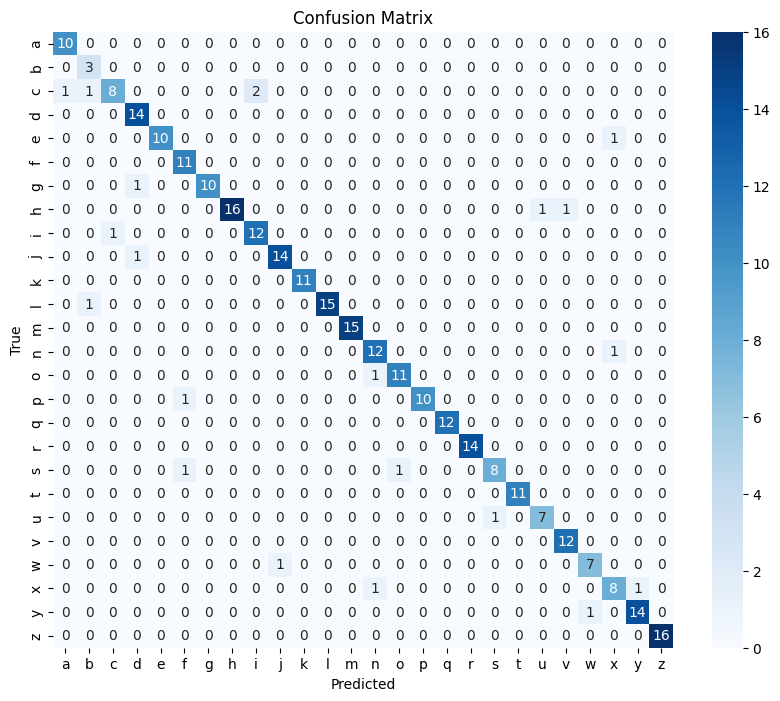

In [ ]:

# Define class labels (assuming you have 26 classes for letters)
class_names = [chr(ord('a') + i) for i in range(26)]

# Create a figure and set the title
plt.figure(figsize=(10, 8))
plt.title("Confusion Matrix")

# Use seaborn to create a heatmap of the confusion matrix
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

# Add labels and adjust layout
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
def resize_with_appearance_preservation(image_path, target_height, target_width):
    # Load the image
    img = cv2.imread(image_path,cv2.IMREAD_COLOR)

    # Resize using cubic interpolation with antialiasing
    resized_img = cv2.resize(img, (target_width, target_height), interpolation=cv2.INTER_LINEAR)

    return resized_img

In [ ]:
def predict_letter(image_path, model):
    # Load and prepare the input image
    img = resize_with_appearance_preservation(image_path,28,28)
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    cv2.imwrite("resized_img.jpg",img)

    prediction = model.predict(img)
    predicted_class = np.argmax(prediction[0])

    predicted_letter = chr(ord('a') + predicted_class)

    return predicted_letter



# Example usage:
predicted_letter = predict_letter('/content/q.jpg', model)
print(f"The predicted letter is: {predicted_letter}")


1/1 [==============================] - 0s 46ms/step
The predicted letter is: q
